# Στοιχεία Ομάδας

##### Ομάδα Β26

Λεούσης Σάββας Α.M.:03114945

Ζαραβίνος Γεώργιος A.M.:03114158

# Εισαγωγή του Ionosphere Data Set

![title](http://archive.ics.uci.edu/ml/assets/MLimages/Large52.jpg)

Αυτά τα δεδομένα ραντάρ συλλέχθηκαν από ένα σύστημα στο Goose Bay, Labrador. Το σύστημα αυτό αποτελείται από μια σταδιακή σειρά από 16 κεραίες υψηλής συχνότητας με συνολική ισχύ εκπομπής της τάξεως των 6,4 κιλοβάτ. Οι στόχοι ήταν ελεύθερα ηλεκτρόνια στην ιονόσφαιρα. Οι "good" επιστροφές ραντάρ είναι εκείνες που δείχνουν ενδείξεις κάποιου τύπου δομής στην ιονόσφαιρα. Οι "bad" επιστροφές είναι αυτές που δεν το κάνουν καθώς τα σήματα τους περνούν μέσα από την ιονόσφαιρα.

Τα ληφθέντα σήματα υποβλήθηκαν σε επεξεργασία χρησιμοποιώντας μια συνάρτηση αυτοσυσχέτισης της οποίας ορίσματα είναι ο χρόνος ενός παλμού και ο αριθμός παλμών. Υπήρχαν 17 αριθμοί παλμών για το σύστημα Goose Bay. Οι περιπτώσεις σε αυτήν τη βάση δεδομένων περιγράφονται με 2 ιδιότητες ανά αριθμό παλμών, που αντιστοιχούν στις πολύπλοκες τιμές που επιστρέφονται από τη συνάρτηση που προκύπτει από το σύνθετο ηλεκτρομαγνητικό σήμα.

Αριθμός Δειγμάτων : 351

Αριθμός Χαρακτηριστικών : 34

Είδος Χαρακτηριστικών : Ακέραιοι, Πραγματικοί

Υπάρχουν μη διατεταγμένα στοιχεία; Όχι

Υπάρχουν επικεφαλίδες; Όχι

Υπάρχουν αριθμίσεις γραμμών; Όχι

Ετικέτες κλάσεων: 'g' για 'good', 'b' για 'bad'

Κολώνα (Column) Ετικετών : 35

Χρειάστηκε μετατροπή του αρχείου; Όχι

Υπάρχουν απουσιάζουσες τιμές; Όχι

Αριθμός κλάσεων : 2 (64% 'g', 36% 'b') "Μη ισορροπημένο (Imbalanced)"

# Data Insertion

In [1]:
from io import StringIO
import requests
import json
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import timeit
!pip install --upgrade imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

Requirement already up-to-date: imbalanced-learn in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s08a-9082e10dd730b1-6f702ff6845a/.local/lib/python2.7/site-packages
Requirement already up-to-date: scikit-learn in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s08a-9082e10dd730b1-6f702ff6845a/.local/lib/python2.7/site-packages (from imbalanced-learn)
Requirement already up-to-date: numpy in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s08a-9082e10dd730b1-6f702ff6845a/.local/lib/python2.7/site-packages (from imbalanced-learn)
Requirement already up-to-date: scipy in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s08a-9082e10dd730b1-6f702ff6845a/.local/lib/python2.7/site-packages (from imbalanced-learn)


In [2]:
def get_object_storage_file_with_credentials_9e289a694b4e4211947aea77a54e113a(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_9acbb12bae2d5d4b4c578bba89be1bfee163f0b6','domain': {'id': '83cffb9693bb429285dec914567206dd'},
            'password': 'kn]^thM5vAsWk2gc'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)
data = get_object_storage_file_with_credentials_9e289a694b4e4211947aea77a54e113a('DefaultProjectsavvasleoussisgmailcom', 'ionosphere.data')

In [3]:
data_df = pd.read_csv(data, header=None)

In [4]:
labels_df = data_df.iloc[:,34]
features_df = data_df.iloc[:,0:34]

In [5]:
np_labels = labels_df.values
np_features = features_df.values

In [6]:
train, test, train_labels, test_labels = train_test_split(np_features, np_labels, test_size=0.20)
sum = 0
for i in range(0,np_labels.size):
    if (np_labels[i]=='g'):
        sum+=1
print 'Dataset Balance ("g") ≈',sum*100/np_labels.size,'%'
print 'Dataset Balance ("b") ≈',100-sum*100/np_labels.size,'%'

Dataset Balance ("g") ≈ 64 %
Dataset Balance ("b") ≈ 36 %


# Data Preprocessing

## Μείωση διαστάσεων εισόδου με επιλογή χαρακτηριστικών

In [7]:
# αρχικοποιούμε έναν selector
selector = VarianceThreshold()
# όπως κάναμε και με τους ταξινομητές τον κάνουμε fit στα δεδομένα εκπαίδευσης
train_reduced = selector.fit_transform(train)
mask = selector.get_support()
test_reduced = test[:,mask]

In [8]:
selector = VarianceThreshold()
train_reduced = selector.fit_transform(train)
mask = selector.get_support()
test_reduced = test[:,mask]

print train_reduced.shape
print train.shape
print test_reduced.shape
print test.shape

(280, 33)
(280, 34)
(71, 33)
(71, 34)


## Κανονικοποίηση χαρακτηριστικών

In [9]:
scaler = preprocessing.StandardScaler().fit(train_reduced)
train_scaled = scaler.transform(train_reduced)
test_scaled = scaler.transform(test_reduced)
print train_scaled.shape

(280, 33)


## Εξισορρόπηση μη ισορροπημένου dataset

In [10]:
ros = RandomOverSampler(random_state=0)
train_resampled, train_labels_resampled = ros.fit_sample(train_scaled,train_labels)
print train_resampled.shape
print train_labels_resampled.shape
sum = 0
for i in range(0,train_labels_resampled.size):
    if (train_labels_resampled[i]=='g'):
        sum+=1
print 'Dataset New Balance ("g") ≈',sum*100/train_labels_resampled.size,'%'
print 'Dataset New Balance ("b") ≈',100-sum*100/train_labels_resampled.size,'%'

(356, 33)
(356,)
Dataset New Balance ("g") ≈ 50 %
Dataset New Balance ("b") ≈ 50 %


# Dummy Classifiers

In [11]:
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_0 = DummyClassifier(strategy="constant", constant='b')
dc_constant_1 = DummyClassifier(strategy="constant", constant='g')
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

In [12]:
ion_macro = {}
ion_weighted = {}
ion_conf = {}
ion_time = {}
start = timeit.default_timer()
model = dc_uniform.fit(train_resampled, train_labels_resampled)
preds = dc_uniform.predict(test_scaled)
ion_macro['uniform (random)'] = f1_score(test_labels, preds, average='macro')
ion_weighted['uniform (random)'] = f1_score(test_labels, preds, average='weighted')
ion_conf['uniform (random)'] = confusion_matrix(test_labels, preds)
print "~~~uniform (random)"
print classification_report(test_labels, preds)
stop = timeit.default_timer()
ion_time['uniform (random)']=stop - start 
start = timeit.default_timer()
model = dc_constant_0.fit(train_resampled, train_labels_resampled)
preds = dc_constant_0.predict(test_scaled)
ion_macro['constant 0'] = f1_score(test_labels, preds, average='macro')
ion_weighted['constant 0'] = f1_score(test_labels, preds, average='weighted')
ion_conf['constant 0'] = confusion_matrix(test_labels, preds)
print "~~~constant 0"
print classification_report(test_labels, preds)
stop = timeit.default_timer()
ion_time['constant 0']=stop - start
start = timeit.default_timer()
model = dc_constant_1.fit(train_resampled, train_labels_resampled)
preds = dc_constant_1.predict(test_scaled)
ion_macro['constant 1'] = f1_score(test_labels, preds, average='macro')
ion_weighted['constant 1'] = f1_score(test_labels, preds, average='weighted')
ion_conf['constant 1'] = confusion_matrix(test_labels, preds)
print "~~~constant 1"
print classification_report(test_labels, preds)
stop = timeit.default_timer()
ion_time['constant 1']=stop - start 
start = timeit.default_timer()
model = dc_most_frequent.fit(train_resampled, train_labels_resampled)
preds = dc_most_frequent.predict(test_scaled)
ion_macro['most frequent label'] = f1_score(test_labels, preds, average='macro')
ion_weighted['most frequent label'] = f1_score(test_labels, preds, average='weighted')
ion_conf['most frequent label'] = confusion_matrix(test_labels, preds)
print "~~~most frequent label"
print classification_report(test_labels, preds)
stop = timeit.default_timer()
ion_time['most frequent label']=stop - start 
start = timeit.default_timer()
model = dc_stratified.fit(train_resampled, train_labels_resampled)
preds = dc_stratified.predict(test_scaled)
ion_macro['stratified'] = f1_score(test_labels, preds, average='macro')
ion_weighted['stratified'] = f1_score(test_labels, preds, average='weighted')
ion_conf['stratified'] = confusion_matrix(test_labels, preds)
print "~~~stratified"
print classification_report(test_labels, preds)
stop = timeit.default_timer()
ion_time['stratified']=stop - start 

print "F1 Macro Scores on the Ionosphere Dataset (20% test set)\n"
for key, value in sorted(ion_macro.iteritems(), key=lambda (k,v): (-v,k)):
    print "%s: %s" % (key, value)
print "\n"
print "F1 Weighted Scores on the Ionosphere Dataset (20% test set)\n"
for key, value in sorted(ion_weighted.iteritems(), key=lambda (k,v): (-v,k)):
    print "%s: %s" % (key, value)
print "\n"
print "Confusion Matrixes on the Ionosphere Dataset (20% test set)\n"
for key, value in ion_conf.iteritems():
    print key,"\n"
    print value,"\n"
print "Running Time Of Dummy Classifiers on the Ionosphere Dataset (20% test set)\n"
for key, value in sorted(ion_time.iteritems(), key=lambda (k,v): (-v,k)):
    print "%s: %s secs" % (key, value)
print "\n"

~~~uniform (random)
             precision    recall  f1-score   support

          b       0.35      0.46      0.40        24
          g       0.68      0.57      0.62        47

avg / total       0.57      0.54      0.55        71

~~~constant 0
             precision    recall  f1-score   support

          b       0.34      1.00      0.51        24
          g       0.00      0.00      0.00        47

avg / total       0.11      0.34      0.17        71

~~~constant 1
             precision    recall  f1-score   support

          b       0.00      0.00      0.00        24
          g       0.66      1.00      0.80        47

avg / total       0.44      0.66      0.53        71

~~~most frequent label
             precision    recall  f1-score   support

          b       0.34      1.00      0.51        24
          g       0.00      0.00      0.00        47

avg / total       0.11      0.34      0.17        71

~~~stratified
             precision    recall  f1-score   support

 

/gpfs/fs01/user/s08a-9082e10dd730b1-6f702ff6845a/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/gpfs/fs01/user/s08a-9082e10dd730b1-6f702ff6845a/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# MLP Classifier

In [13]:
start = timeit.default_timer()
clf = MLPClassifier(solver="lbfgs",hidden_layer_sizes=(1,))
clf.fit(train_resampled, train_labels_resampled)
preds = clf.predict(test_scaled)
print classification_report(test_labels, preds)
ion_macro['Default MLP']=f1_score(test_labels, preds, average='macro')
ion_weighted['Default MLP']=f1_score(test_labels, preds, average='weighted')
print "f1_macro:    ",f1_score(test_labels, preds, average='macro')
print "f1_weighted: ",f1_score(test_labels, preds, average='weighted')
print "\n Confusion Matrix: \n",confusion_matrix(test_labels, preds)
stop = timeit.default_timer()
ion_time['Default MLP']=stop-start
print "\n Running Time:",stop - start,"secs" 

             precision    recall  f1-score   support

          b       0.95      0.75      0.84        24
          g       0.88      0.98      0.93        47

avg / total       0.91      0.90      0.90        71

f1_macro:     0.883251115809
f1_weighted:  0.898166069473

 Confusion Matrix: 
[[18  6]
 [ 1 46]]

 Running Time: 0.68776679039 secs


## Optimized MLP

In [14]:
best_macro = 0.0
best_macro_n = 0
best_weighted = 0.0
best_weighted_n = 0
start = timeit.default_timer()
for i in range(1,20):
    clf = MLPClassifier(solver="lbfgs",hidden_layer_sizes=(i,))
    clf.fit(train_resampled, train_labels_resampled)
    preds = clf.predict(test_scaled)
    scores0 = cross_val_score(clf, train_resampled, train_labels_resampled, cv=10, scoring='f1_macro')
    if (np.mean(scores0, axis=0) > best_macro):
        best_macro = np.mean(scores0, axis=0)
        best_macro_n = i
    scores1 = cross_val_score(clf, train_resampled, train_labels_resampled, cv=10, scoring='f1_weighted')
    if (np.mean(scores1, axis=0) > best_weighted):
        best_weighted = np.mean(scores1, axis=0)
        best_weighted_n = i
print "Best size of MLP hidden layers (macro):   ",best_macro_n
print "Best size of MLP hidden layers (weighted):",best_weighted_n
stop = timeit.default_timer()
print "\n Running Time:",stop - start,"secs" 

Best size of MLP hidden layers (macro):    18
Best size of MLP hidden layers (weighted): 11

 Running Time: 15.5983538628 secs


In [15]:
clf = MLPClassifier(solver="lbfgs",hidden_layer_sizes=(best_weighted_n,))
clf.fit(train_resampled, train_labels_resampled)
preds = clf.predict(test_scaled)
weighted_score = f1_score(test_labels, preds,average="macro")
clf = MLPClassifier(solver="lbfgs",hidden_layer_sizes=(best_macro_n,))
clf.fit(train_resampled, train_labels_resampled)
preds = clf.predict(test_scaled)
macro_score = f1_score(test_labels, preds,average="macro")
start = timeit.default_timer()
if (macro_score < weighted_score):
    clf = MLPClassifier(solver="lbfgs",hidden_layer_sizes=(best_weighted_n,))
    clf.fit(train_resampled, train_labels_resampled)
    preds = clf.predict(test_scaled)
    print classification_report(test_labels, preds)
    ion_macro['Optimized MLP']=f1_score(test_labels, preds, average='macro')
    ion_weighted['Optimized MLP']=f1_score(test_labels, preds, average='weighted')
    print "f1_macro:    ",f1_score(test_labels, preds, average='macro')
    print "f1_weighted: ",f1_score(test_labels, preds, average='weighted')
    print "\n Confusion Matrix: \n",confusion_matrix(test_labels, preds)
else:
    clf = MLPClassifier(solver="lbfgs",hidden_layer_sizes=(best_macro_n,))
    clf.fit(train_resampled, train_labels_resampled)
    preds = clf.predict(test_scaled)
    print classification_report(test_labels, preds)
    ion_macro['Optimized MLP']=f1_score(test_labels, preds, average='macro')
    ion_weighted['Optimized MLP']=f1_score(test_labels, preds, average='weighted')
    print "f1_macro:    ",f1_score(test_labels, preds, average='macro')
    print "f1_weighted: ",f1_score(test_labels, preds, average='weighted')
    print "\n Confusion Matrix: \n",confusion_matrix(test_labels, preds)
    
stop = timeit.default_timer()
ion_time['Optimized MLP'] =stop-start 
print "\n Running Time:",stop - start,"secs" 

             precision    recall  f1-score   support

          b       1.00      0.75      0.86        24
          g       0.89      1.00      0.94        47

avg / total       0.93      0.92      0.91        71

f1_macro:     0.898571428571
f1_weighted:  0.91199195171

 Confusion Matrix: 
[[18  6]
 [ 0 47]]

 Running Time: 0.0192270278931 secs


# Στατιστικά Αποτελέσματα

             F1 Macro Scores


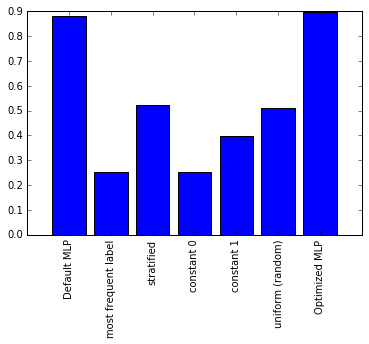

             F1 Weighted Scores


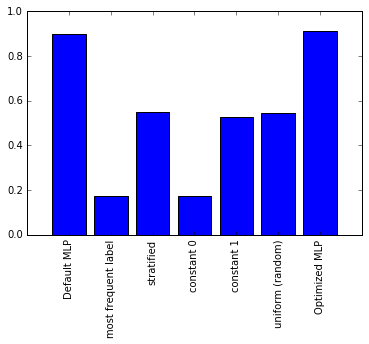

             Running Time (secs)


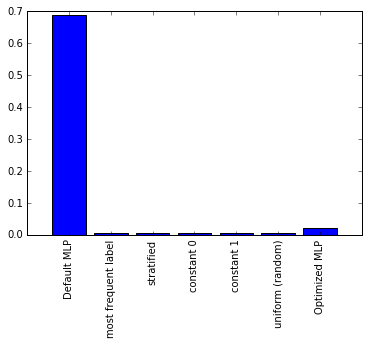

In [16]:
plt.bar(range(len(ion_macro)), ion_macro.values(), align='center')
plt.xticks(range(len(ion_macro)), ion_macro.keys(), rotation=90)
print "             F1 Macro Scores"
plt.show()

plt.bar(range(len(ion_weighted)), ion_weighted.values(), align='center')
plt.xticks(range(len(ion_weighted)), ion_weighted.keys(), rotation=90)
print "             F1 Weighted Scores"
plt.show()

plt.bar(range(len(ion_time)), ion_time.values(), align='center')
plt.xticks(range(len(ion_time)), ion_time.keys(), rotation=90)
print "             Running Time (secs)"
plt.show()

In [17]:
print "MLP Optimization Percentage (macro)    :",(ion_macro['Optimized MLP']-ion_macro['Default MLP'])/ion_macro['Default MLP']*100,"%"
print "MLP Optimization Percentage (weighted) :",(ion_weighted['Optimized MLP']-ion_weighted['Default MLP'])/ion_macro['Default MLP']*100,"%"

MLP Optimization Percentage (macro)    : 1.73453647416 %
MLP Optimization Percentage (weighted) : 1.56533991181 %


#### Σχολιασμός Αποτελεσμάτων
Παραπάνω φαίνονται τα αποτελέσματα για όλους τους classifiers, δηλαδή τους dummy και τον MLP (τον default και τον optimized). Όπως φαίνεται, ο MLP είναι ο καλύτερος ταξινομητής και στις 2 μετρικές απόδοσης που χρησιμοποιούμε (F1 Macro Scores και F1 Weighted Scores). Ανάμεσα στις 2 μετρικές δεν παρατηρούμε σχεδόν καθόλου διαφορές. Από τους dummy ταξινομητές, ο stratified ειναι σίγουρα ο καλύτερος και αμέσως μετά βρίσκεται ο uniform(random). Φυσικά αυτό δεν μας βοηθάει να βγάλουμε σημαντικά συμπεράσματα αφού αυτοί οι classifiers είναι dummy και ουσιαστικά δεν δίνουν αποτελέσματα με βάση την εκπαίδευσή τους αλλά σύμφωνα με την ταυτότητά τους (για παράδειγμα ο constant_0 δίνει ως απάντηση συνεχώς 0). 

Αυτός ο ταξινομητής που μας ενδιαφέρει πραγματικά ο MLP και φυσικά ο Optimized MLP. Ουσιαστικά, η διαφορά του optimized είναι ότι αντί για έναν νευρώνα που χρησιμοποιεί ο default MLP, ελέγχει 20 νευρώνες και κρατάει την πιο υψηλή τιμή για κάθε μία από τις μετρικές που έχουμε. Γι' αυτό το λόγο βγάζει κατά περίπου 6,5% καλύτερα αποτελέσματα. Μάλιστα, αν κοιτάξουμε και τον πίνακα Confusion Matrix, παρατηρούμε ότι ουσιαστικά σε 71 προβλέψεις, ο Optimized MLP κάνει μόνο 4 λάθη αντί των 8 που κάνει ο default MLP.

Τέλος, αν κοιτάξουμε και τον χρόνο εκτέλεσης των παραπάνω classifiers, βλέπουμε ότι τον περισσότερο χρόνο κάνει ο default MLP (περίπου 7 δευτερόλεπτα), ενώ όλοι οι υπόλοιποι κάνουν χρόνο πολύ κοντά στο 0 (μηδέν) με τον Optimized να κάνει ελαφρώς περισσότερο.